<i> Copyright &copy; 2025 Johns Hopkins University.  Not for distribution online or by any other means.</i>

Evan Edelstein, Programming Assignment 2, Algorithms 605.621  **PUT YOUR NAME ON THE ASSIGNMENT**

***Statement of Academic Integrity:*** Put your statement of academic integrity here.  Failure to do so will result in deduction of points.


The work in this exercise is mine alone without un-cited help. No AI was used to answer these questions.

# Overview

[The Maryland Lighthouse Challenge](https://cheslights.org/maryland-lighthouse-challenge/) is a biennial event where people race around the state of Maryland attempting to visit all 10 historic lighthouses and one lightship spread out among the most beautiful parts of the state.  The goal is to be the first team to visit all of the lighthouses during the challenge weekend.  One of your [professors and his wife](https://www.facebook.com/cheslights/photos/a.2861267277221280/2995180270496646/?type=1&theater) have [competed very favorably](https://cheslights.org/1st-finishers-results-2019-md-lighthouse-challenge/) in these events ;-)  

The lighthouse challenge can be modeled as an instance of the *traveling salesperson problem (TSP)* that recurs frequently in networking, semiconductor layouts,and efficient routing.  This is a specific example of a class of problems called <i>NP-Complete</i> problems, which we will study in more detail in a later module.  For now, it's important to note that one characteristic of these NP-complete problems is that there is no way to be certain that we have found the overall best tour, without measuring every possible tour through the lighthouse list.

This multi-part problem will have you explore different strategies for identifying the optimal *tour*&mdash;the path and starting point that leads contestants to visit all lighthouses finishing at the earliest possible time, with algorithms that run in a reasonable amount of wall-clock time.  In part one, you'll implement a brute-force algorithm for *solving* TSP&mdash;in our case, the fastest tour covering all the lighthouses.  As noted, in order to find the true optimum path, we must check every possible path in the set of lighthouses.  Our brute-force code will then be our "benchmark" for further exploration into various techniques for trading off speed of calculation, memory usage, and error rate.

For this problem, you should use the following assumptions:
1. The contest requires a visit of all lighthouses; the winner is the first team to visit all lights (the contestants do not need to return to the start point).
1. Teams may start at any lighthouse, and finish at any other lighthouse. 
1. Travel time from A to B is the same as the time from B to A. (Equivalently, the paths A->B->C and C->B->A are equal, and your algorithm is correct if it provides either one.  You do not need to provide both.)
1. Several utility functions are provided for your use-- you may modify these as you see fit, or write your own


# Restrictions

1. You must provide a recursive solution to the problem (i.e. don't use nested loops)
1. You may not use Python libraries for combinatorics, sorting, permutations, combinations, or similar tools-- for example, you cannot use any function in Python's itertools library.  You need to build all logical structures that traverse the data set yourself, so that you can accurately measure the workload imposed by your algorithmic choices.
1. When in doubt, **ASK FIRST**
1. This is not a collaborative problem-- all the work in this notebook should be your individual effort
1. Don't change the signatures of the functions or the kickoff code, as this is used by the grader for automated correctness checking.  You will get points off if you modify the input and output blocks (noted with "DO NOT MODIFY THIS BLOCK") or if your code doesn't execute without modification.  


# PART 1:  IMPLEMENTATION

## 1a. Pseudocode (15 pts)
Construct a *recursive algorithm* that finds the fastest tour, and corresponding total tour time, starting at a specific lighthouse and visits a given set of lighthouses.  
	
<!--- This is a Markdown comment. -->
<!--- Separate the $...$ in many cases to get Latex to render properly.
      In output LaTeX, use incorrectly closed <span hidden> to pass in LaTeX options. -->
// ***I WILL MAKE THIS PSEUDOCODE INTO MY ALGORITHM.***

<!-- Function fastest_tour returns time, orderedList of lighthouses.
1. **function** fastest_tour(x, L):  <span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~$ *# MY ALGORITHM HERE, takes in foo, returns bar* <br>
   $~~~~$ *# acknowledging that this is example code and is not at all correct*
1. $~~~~$ newL $\gets$ ``list_minus``(L, x)   *# example of one of the functions*
1. $~~~~$ y $\gets$ L\[0\]   
1. $~~~~$ ntime, ntour $\gets$ ``fastest_tour``(y, newL)  *# example recursion*   
1. $~~~~$ tour $\gets$ \[x, y\]  *# example of creating an ordered list*
1. $~~~~$ time $\gets$ ``travel_time``(x, y)
1. $~~~~$ **return** time, tour -->


```python
function fastest_tour_bf(start_light,L) 
    # function excepts a lighthouse x and list of lighthouses L
    # brute force alg 
    # for each starting point x, traverse L and find the subtour with the shortest time
    best_time, best_tour <- INF, NULL # init temp vars to hold current best time and best tour
    L <- list_minus(L, second_light) # pop start_light from list


    if L.length is 0:
        return [start_light], 0

    for second_light in L
        L_prime <- list_minus(L, second_light) # pop neighbor node from list
        # recurse through all possible sub-tours
        sub_tour, sub_time <- fastest_tour(second_light,L_prime) 
        second_light_time <- get_travel_time(start_light, second_light) + sub_time # provided fn 
        if second_light_time < best_time # new closest lighthouse
            update best_time and best_tour to second_light_time and sub_tour
            
    insert start_light at front of tour list
    return best_tour, best_time
```

## 1b. English-language explanation (15 pts)

The aim of the pseudocode above is to implement the function fastest_tour_bf, which finds the shortest tour to traverse all nodes in an array L starting from a node start_light. The function is implemented recursively using a brute-force approach, which evaluates all permutations of tours of L, to find the shortest route. The base case of the recursion if when L contains no nodes, in which case the shortest tour is just the starting node and the time is 0.0. When L contains more than one node, each “neighbor” node second_light in L is removed from L to form L\` and then recursively searched with start_light now set to the second_light. For each recursive subtour starting at node second_light, the tour time is computed as the sum of the best subtour of L starting at second_light and the travel time between the starting node and second_light. If this sum is less than the best_time variable it is assigned to best_time and the subtour is assigned to best_tour. The fastest subtour for all neighbors is prepended with the starting node and returned. In this way all the fastest subtour starting at all neighbors of start_light are compared, and the shortest is selected. Each pair of nodes is assigned a travel time, which can be queried using an external get_travel_time(start_light,second_light) function.

## 1c. Code implementation (25 pts)

Implement your pseudocode from above, using the following signature and code snippets.  Your code must have a reasonable, consistent, style and documentation. It must have appropriate data structures, modularity, and error checking.  Be sure to preserve the instructor input block, and do not change names of any of the variables - they will be inputted fresh by the instructor when testing your code.  Print the best tour and time, using the TRAVEL_TIME and L provided in the instructor input block, so that the correctness of your implementation can be validated.

In [1]:
####################################################
# INSTRUCTOR INPUT BLOCK
# THIS BLOCK WILL BE REPLACED BY INSTRUCTOR INPUTS
# DO NOT CHANGE THE NAMES OF THESE VARIABLES/METHODS
####################################################
TRAVEL_TIME = { 
      ('B', 'A') : 8.043412251828856 ,
      ('B', 'C') : 6.961562065036552 ,
      ('B', 'E') : 11.182761725279896 ,
      ('B', 'D') : 4.829491781522557 ,
      ('A', 'C') : 11.933637650024707 ,
      ('A', 'E') : 17.726993564286605 ,
      ('A', 'D') : 9.160385528861413 ,
      ('C', 'E') : 13.366783356602122 ,
      ('C', 'D') : 5.995980076893033 ,
      ('E', 'D') : 10.864682204416317 ,
}
# Additional test data is given at the bottom of the notebook.  You should also create your own test data as needed

# This function will populate a list L containing the names of the lighthouses
L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))


In [2]:
# Utility functions that you can use if you wish

def list_minus(L, x):
    # Returns a list of L that does not have x in it
    return list(set(L)-set([x,]))

# def travel_time(x, y):
#     # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
#     global TRAVEL_TIME
#     try:
#         tm = TRAVEL_TIME[(x,y)] 
#     except:
#         tm = TRAVEL_TIME[(y,x)]
#     return tm

def random_lighthouses(n):
    # Generates a random list of n lighthouses
    # returns a dictionary in the same format as TRAVEL_TIME and a list of lighthouses (new_L)

    from string import ascii_uppercase
    from random import uniform
    from itertools import combinations as illegal_for_students # students aren't allowed to use itertools for this assignment
    from math import sqrt

    new_TRAVEL_TIME = {}
    new_L = []
    pts = {}
    letters = list(ascii_uppercase)
    

    for i in range(1, n+1):
        x = uniform(1, 10)
        y = uniform(1, 10)
        pt_name = letters[i - 1]
        pts[pt_name] = (x,y)
        new_L.append(pt_name)

    pairs = list(illegal_for_students(new_L, 2))
    for i in pairs:
        pt1 = pts[i[0]]
        pt2 = pts[i[1]]
        dist = sqrt((pt1[0] + pt2[0] ** 2 + (pt1[1] + pt2[1]) ** 2))
        name = (i)
        new_TRAVEL_TIME[name] = dist
    return new_TRAVEL_TIME, new_L


def lighthouse_names(L):
    # Gets a list of the names of the lighthouses in dictionary L
    return list(set([item for k in TRAVEL_TIME.keys() for item in k]))
    


In [3]:
####################################################
# MY RECURSIVE FUNCTION
####################################################
from math import inf

def get_travel_time(x: str, y: str) -> float:
    # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
    global TRAVEL_TIME
    tm = TRAVEL_TIME.get((x, y), TRAVEL_TIME.get((y,x)))
    if tm is None:
        raise KeyError(f"{x=} and {y=} not in TRAVEL_TIME.")
    return tm

def fastest_tour_bf(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    """
    Brute force graph traversal.
    
    ASSUMES a global variable TRAVEL_TIME exists which maps a tuple of start, end lighthouses to travel times and can be accessed with travel_time(start, stop)
    ASSUMES a function list_minus(L, x), which removes an element x from the list L

    Args:
        start_light (str): starting point of tour
        L (list[str]): light of lighthouses to visit

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of recursive steps executed by the algorithm
    """    
    # Accepts start_point (starting lighthouse name), list L (all lighthouses)
    # Returns best_tour (sequential list of lighthouses) and best_time (float value of best time in hours)
    # You must keep the signatures the same (accepts start_light, L and returns best_tour, best_time;
    #     start_light is a string, best_tour and L are lists of strings, and best_time is a float)
    # You must provide a recursive algorithm and must evaluate every possible route
    # Otherwise, you are free to change anything in here-- change variables, use a different structure,
    #     switch to object-oriented coding, etc.
    # Be sure that your pseudocode matches your actual code!

    # NOTE: There are two possible approaches to counting the steps: one is to use a recursive approach as
    # demonstrated in PA1.  The other is to use a global variable and add to it from within the function.  The
    # first method is preferred as more "Pythonic", the second may be easier for novice programmers.  If you use
    # the first method, uncomment the return signatures and function calls that reference the variable "steps",
    # and comment out the return values that don't (throughout the notebook).  Otherwise, leave the return values
    # alone.

    best_tour = []  # used to store the running best overall tour that starts at start_light
    best_time = inf  # used to store the time for the best_tour sequence
    all_steps = 0
    # L = list_minus(L, start_light) # remove start_light from list - already done by wrapper
    
    # BASE CASE - if no lighthouses left return the start_light and time of zero
    if len(L) == 0:
        return [start_light], 0.0, 1

    # RECURSIVE CASE
    # This should recursively compute all possible tours through L which begin at start_light
    for second_light in L:
        # second_light is the next step in the path (start_light--> second_light --> rest of L)
        # you need to check every possible choice for second_light
        L_prime = list_minus(L, second_light) # remove possible next lighthouse
        sub_tour, sub_time, steps = fastest_tour_bf(second_light, L_prime) # recurse to find shortest subpath of L starting from second_light
        all_steps += steps
        y_time = get_travel_time(start_light, second_light) # calc time between start_light and second_light
        if (sub_time + y_time) < best_time: # update best_tour and best_time with new candidate 
            best_tour = sub_tour
            best_time = sub_time + y_time


    # Now finish out the calculations:
    # Remember to add the time from your start point to second_lighthouse back into time
    #      and append start_light back onto the beginning of tour.
    # Compare this result for start_light-->(rest of the list) to the previous best_tour,
    #     best_time (for all the previous potential starting points)
    best_tour.insert(0, start_light)  # insert start_light at the front of best tour
    return best_tour, best_time, all_steps


# """The input for the function, return value for the base case, and return value for"""
# """the recursive case must match exactly."""

In [4]:
####################################################
# KICKOFF CODE
# This will run an outer loop to try all possible starting lights
# You will need to adjust this code to match your implementation
####################################################


def fastest_tour_wrapper(L: list[str], travel_time_dict: dict[tuple[str, str], float]):
    """ Wrapper to fastest_tour_bf to find shortest path amongst all starting possible lighthouses

    Args:
        L (list[str]): light of lighthouses to visit
        travel_time_dict (dict[tuple[str], float]): _description_

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of recursive steps executed by the algorithm
    """
    print(f"Working on {L=}")
    # update global dict TRAVEL_TIME
    global TRAVEL_TIME 
    TRAVEL_TIME = travel_time_dict
    tours = {}
    best_tour = []
    best_time = inf
    best_steps = 0
    for start_light in L:
        L_minus = list_minus(L, start_light)
        sub_tour, sub_time, steps = fastest_tour_bf(start_light, L_minus)
        tours[start_light] = (sub_tour, sub_time)
        if sub_time < best_time:
            best_tour = sub_tour
            best_time = sub_time
            best_steps = steps
    print("The best tour is: ", ', '.join(best_tour))
    print("The best time is: ", best_time)
    return best_tour, best_time, best_steps, tours

# Uncomment one of these implementations
# If using a recursive step count:
# best_tour = []
# best_time = inf
# print(L)
# for start_light in L:    
#     L_minus = list_minus(L, start_light)
#     curr_tour, curr_time, steps = fastest_tour_bf(start_light, L_minus)
#     if curr_time < best_time:
#         best_tour = curr_tour
#         best_time = curr_time


# If using a global variable for step count:
#best_tour = []
#best_time = inf
#steps = 0
#for start_light in L:     
#    L_minus = list_minus(L, start_light)
#    curr_tour, curr_time = fastest_tour_bf(start_light, L_minus)
#    if curr_time < best_time:
#        best_tour = curr_tour
#        best_time = curr_time

best_tour, best_time, best_steps, tours = fastest_tour_wrapper(L, TRAVEL_TIME)

Working on L=['D', 'A', 'C', 'B', 'E']
The best tour is:  A, B, C, D, E
The best time is:  31.86563659817476


In [5]:
####################################################
# CORRECTNESS CHECK
# Do not modify this block
# Grader data will be placed here and must run without errors
####################################################

TRAVEL_TIME = { 
      ('B', 'A') : 8.043412251828856 ,
      ('B', 'C') : 6.961562065036552 ,
      ('B', 'E') : 11.182761725279896 ,
      ('B', 'D') : 4.829491781522557 ,
      ('A', 'C') : 11.933637650024707 ,
      ('A', 'E') : 17.726993564286605 ,
      ('A', 'D') : 9.160385528861413 ,
      ('C', 'E') : 13.366783356602122 ,
      ('C', 'D') : 5.995980076893033 ,
      ('E', 'D') : 10.864682204416317 ,
}

L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))

# Uncomment one of these implementations
# If using a recursive step count:
best_tour = []
best_time = inf

for start_light in L:    
    L_minus = list_minus(L, start_light)
    curr_tour, curr_time, _ = fastest_tour_bf(start_light, L_minus)
    if curr_time < best_time:
        best_tour = curr_tour
        best_time = curr_time

# If using a global variable for step count:
#best_tour = []
#best_time = inf
#steps = 0
#for start_light in L:     
#    L_minus = list_minus(L, start_light)
#    curr_tour, curr_time = fastest_tour_bf(start_light, L_minus)
#    if curr_time < best_time:
#        best_tour = curr_tour
#        best_time = curr_time

print("The best tour is: ", ', '.join(best_tour))
print("The best time is: ", best_time)

The best tour is:  A, B, C, D, E
The best time is:  31.86563659817476


# PART 2: ANALYSIS

## 2a. Asymptotic bounds (15 pts)

Using the techniques that you learned in Modules 1 and 2, provide an analytic estimate of the asymptotic bounds (Big-O, Big-Theta, etc.) for your algorithm

Since all permutations of L are evaluated, the runtime should be Θ(n!), where n is the number of nodes in L. This can also be proved from the implementation. For each function call we perform several constant time operations, such as comparison, addition, hashtable lookup and get/set from start of list (we can use linked list to make this constant time) and n-1 recursive calls for each node in L. This can be written in terms of the recurrence relation: 

T(n)=(n)T(n-1)+O(1)

Expanding the recurrence:
- T(n) = (n)T(n-1)+O(1)
- T(n-1) = (n-1)T(n-2)+O(1)
- T(1) = 1

Solving the recurrence and dropping the constant time terms:

- T(n) = (n)*(n-1)*(n-2) ...* 1 = n!

Thus, we see the runtime of the algorithm is Θ(n!) for L with n node. This assumes that list_minus is implemented in constant time (I am unsure about the set semantics in Python). If instead a naive linear time function was used the runtime of the algorithm would be Θ(n!) * O(n) 

Since we remove the starting light in the wrapper code our expected runtime should be Θ((n-1)!)


## 2b. Code analysis (20 pts)

To estimate the computational complexity of your algorithm, you will need to run it against a number of different scenarios and capture a measure of the work done for each run.  Using the provided utility function, generate random sets of 3-10 lighthouses and then run your algorithm on them.  Gather the execution steps that your algorithm expends on them and then plot the results.  Finally, provide an analysis of your algorithm's running time and performance.  


In [6]:
# MY CODE BLOCK TO EXPERIMENT WITH 3-10 LIGHTHOUSES AND GATHER EXECUTION STEPS
myresults = []
START,STOP = 3,10
for i in range(START, STOP):
    time_dict, L = random_lighthouses(i)
    best_tour, best_time, best_steps, tours = fastest_tour_wrapper(L, time_dict)
    myresults.append(best_steps)
    # print(i, best_steps)

print(myresults)


Working on L=['A', 'B', 'C']
The best tour is:  B, A, C
The best time is:  20.379409780125798
Working on L=['A', 'B', 'C', 'D']
The best tour is:  B, A, D, C
The best time is:  38.56102320122636
Working on L=['A', 'B', 'C', 'D', 'E']
The best tour is:  B, A, D, C, E
The best time is:  42.90217644837939
Working on L=['A', 'B', 'C', 'D', 'E', 'F']
The best tour is:  F, A, C, B, E, D
The best time is:  60.36077503147818
Working on L=['A', 'B', 'C', 'D', 'E', 'F', 'G']
The best tour is:  B, C, A, G, D, F, E
The best time is:  71.22634481095224
Working on L=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
The best tour is:  C, D, A, F, B, G, E, H
The best time is:  78.41937890217474
Working on L=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
The best tour is:  C, B, D, A, I, E, G, F, H
The best time is:  98.41523653429527
[2, 6, 24, 120, 720, 5040, 40320]


### Plot
Plot the execution steps below.  You can use the plotting example from PA 1 as a guide here.

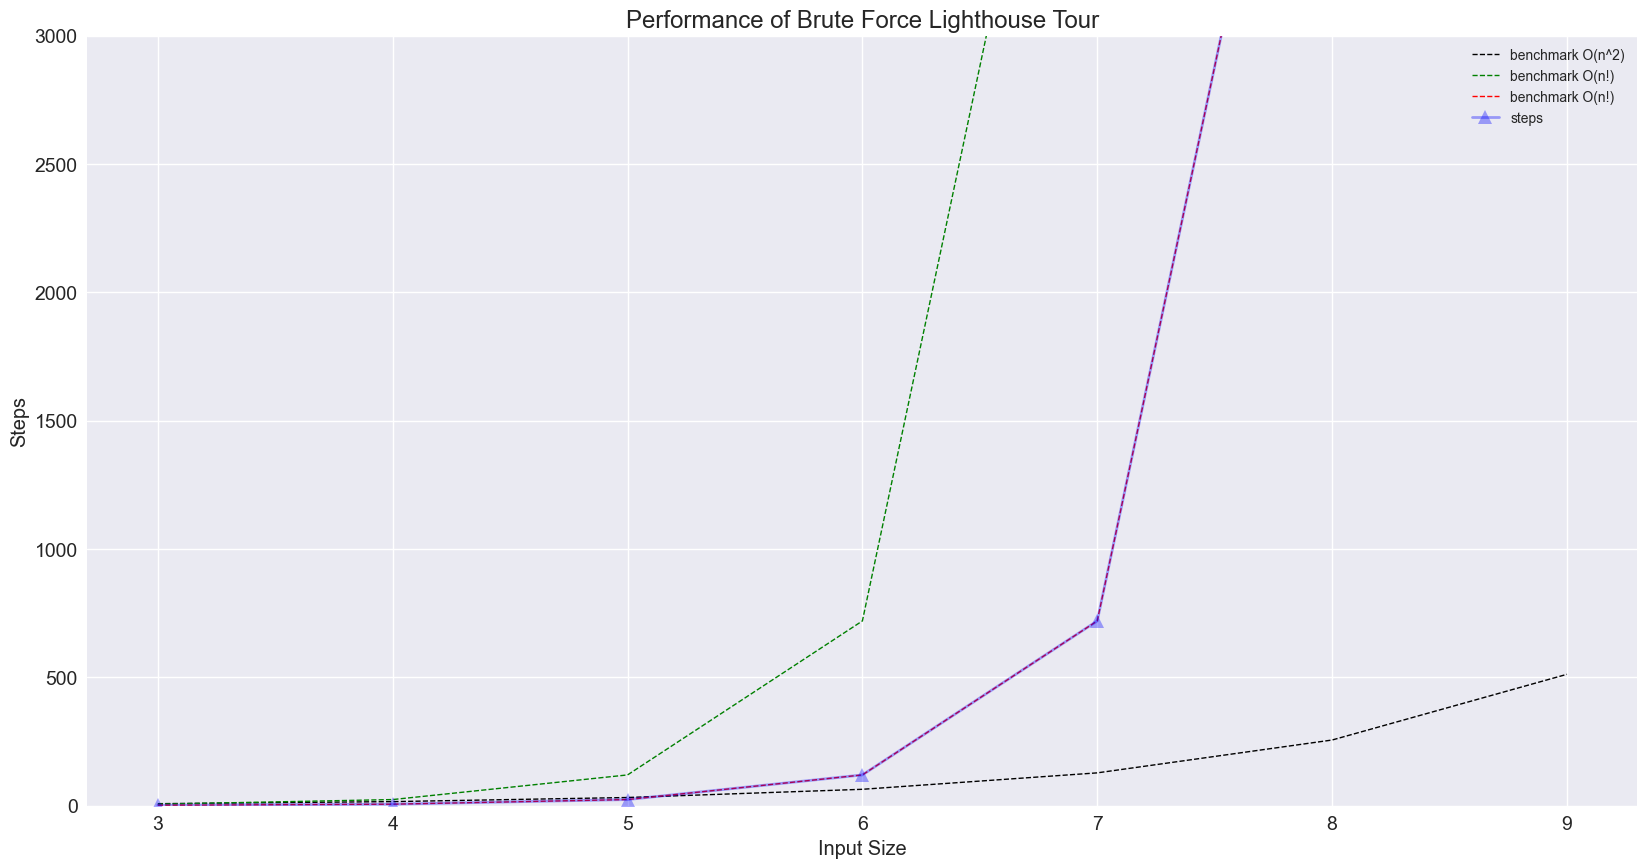

In [7]:
%matplotlib inline
from math import factorial
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

yvals = myresults 
xvals = [i for i in range(START,STOP)]

plt.rcParams['figure.figsize'] = [20,10]
plt.figure()
plt.title("Performance of Brute Force Lighthouse Tour", size="xx-large")
plt.ylabel("Steps", size="x-large")
plt.xlabel("Input Size", size="x-large")
plt.ylim([0,3000]) # y-axis scale

# The "b^-" has meaning - "b" means blue, "^" means triangles (try *, s, o), 
# "-" means draw a line
yTestVals1 = [] 
yTestVals2 = [] 
yTestVals3 = [] 
# generate bench mark data 

for i in range(START, STOP):
    yTestVals1.append(2**i)
    yTestVals2.append(factorial(i))
    yTestVals3.append(factorial(i-1))

plt.plot(xvals, yTestVals1, "k^--", markersize=0, linewidth=1, label="benchmark O(n^2)")
plt.plot(xvals, yTestVals2, "g^--", markersize=0, linewidth=1, label="benchmark O(n!)")
plt.plot(xvals, yTestVals3, "r^--", markersize=0, linewidth=1, label="benchmark O(n!)")
plt.plot(xvals, yvals, "b^-", markersize=10, linewidth=2, label="steps", alpha=0.35)
plt.tick_params(axis="both", which="major", labelsize=14)
plt.legend()


# PART 3 RETROSPECTION

## Retrospection (10 pts)

Explain your results here.  Your graph should "tell a story"... write the story in plain English here.

If you had a problem with your code, or graph, write down here how you followed the 1-2-3 Rule given in the Getting Started module.  You should explain what you tried to do, what did/did not work, and what you would do next if you had additional time.  **Important:  don't just turn in broken code, or graphs that don't match your analytic results!**  It's important to show that, if there was some problem, you recognized that there was an issue and what you were doing to resolve the disconnect.  Bugs and mistakes do happen, time does run out, but you need to show what you understand of the problem in order to get at least partial credit. 

The function fastest_tour_bf(start_light, L) implements the pseudocode algorithm described above. The function finds the shortest tour of lighthouses in L starting from start_light. In addition to computing the shortest tour, the number of recursive steps is tallied to estimate the runtime of the algorithm. The graph in 2b, verifies out runtime analysis but with a slight deviation. In fact, the number of steps in our algorithm is Θ(n-1)! - the red line, not Θ(n!) - the green line, where n is the total lighthouses. Since our wrapper function removes start_light from L the runtime is Θ(n-1!) in the plot. This off-by-one error confused me during the initial implementation but debugging the code helped elucidate the difference in size between L and total lighthouses.

A few modifications were made to improve code quality. Type definitions were assigned to the parameters, return types and variables of the function and method documentation was provided. An alternative implementation of TRAVEL_TIME() was implemented as get_travel_time(), which raises an expectation if the keys are not found in the map. Lastly a wrapper function was made to call fastest_tour_bf(start_light, L) starting at each lighthouse in L. This allowed for easier testing. Test cases were defined and used to validate the implementation, ensuring code changes did not affect the efficacy of the algorithm. If possible, explicitly passing the TRAVEL_TIME map to fastest_tour_bf() would have been preferred over global variable in get_travel_time(). 


## Citations
Cite any help you received and any sources you referenced here

In [8]:
# INSTRUCTOR-PROVIDED TEST DATA
# Ensure that your code matches both the input signature and the expected output
# For grading, different test data will be pasted into the input cell and your code cells will be executed
# Be sure that your input and output signatures match the provided sample data
# Times are symmetrical, so the reverse order tour is also acceptable (e.g. A, B, C or C, B, A)

# Test #1
TRAVEL_TIME_1 = { 
      ('D', 'E') : 9.8874546134365,
      ('D', 'B') : 8.650955785569098 ,
      ('D', 'C') : 4.527990409960845 ,
      ('D', 'A') : 9.817667809230786 ,
      ('E', 'B') : 10.931854306263975 ,
      ('E', 'C') : 7.255251488484818 ,
      ('E', 'A') : 12.917982527478712 ,
      ('B', 'C') : 4.113565483054365 ,
      ('B', 'A') : 9.560863383439097 ,
      ('C', 'A') : 7.854345573910511 ,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  28.089873889890804

# Test #2
TRAVEL_TIME_2 = { 
      ('B', 'C') : 6.429795406216918 ,
      ('B', 'A') : 11.629846115160516 ,
      ('B', 'D') : 7.679251919404714 ,
      ('B', 'E') : 9.347706263090837 ,
      ('C', 'A') : 12.280646160363432 ,
      ('C', 'D') : 7.746192483295421 ,
      ('C', 'E') : 9.90681627370574 ,
      ('A', 'D') : 12.227183481562683 ,
      ('A', 'E') : 16.655823285647106 ,
      ('D', 'E') : 8.25715774835559 ,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  34.06299175302845

# Test #3
TRAVEL_TIME_3 = { 
      ('F', 'E') : 7.453320453415392 ,
      ('F', 'D') : 6.170569410345761 ,
      ('F', 'I') : 10.448429302986911 ,
      ('F', 'G') : 6.187750187309644 ,
      ('F', 'C') : 12.090422838563583 ,
      ('F', 'H') : 11.539119418380032 ,
      ('F', 'A') : 13.23865323724485 ,
      ('F', 'J') : 14.209616157057711 ,
      ('F', 'B') : 12.029520235766265 ,
      ('E', 'D') : 4.594971038617467 ,
      ('E', 'I') : 9.488857351897519 ,
      ('E', 'G') : 4.661282508675182 ,
      ('E', 'C') : 10.705763401441896 ,
      ('E', 'H') : 10.12354365573923 ,
      ('E', 'A') : 12.05863087182219 ,
      ('E', 'J') : 12.857918364285274 ,
      ('E', 'B') : 10.915808926216425 ,
      ('D', 'I') : 8.773798408565863 ,
      ('D', 'G') : 3.549820998388679 ,
      ('D', 'C') : 9.084763991756446 ,
      ('D', 'H') : 8.47244200438249 ,
      ('D', 'A') : 10.768085646027655 ,
      ('D', 'J') : 11.205467989446557 ,
      ('D', 'B') : 9.811703475051996 ,
      ('I', 'G') : 4.856711290250502 ,
      ('I', 'C') : 10.303247633652786 ,
      ('I', 'H') : 9.72873923304563 ,
      ('I', 'A') : 11.752971702744057 ,
      ('I', 'J') : 12.386140947772116 ,
      ('I', 'B') : 10.715926552978804 ,
      ('G', 'C') : 8.939922836985131 ,
      ('G', 'H') : 8.325372714362043 ,
      ('G', 'A') : 10.658709470483634 ,
      ('G', 'J') : 11.05300320168352 ,
      ('G', 'B') : 9.726036954632448 ,
      ('C', 'H') : 14.85107596522508 ,
      ('C', 'A') : 16.127909792272288 ,
      ('C', 'J') : 17.54748278310382 ,
      ('C', 'B') : 14.699070399680458 ,
      ('H', 'A') : 15.723529687188293 ,
      ('H', 'J') : 17.10791004081554 ,
      ('H', 'B') : 14.306778662449995 ,
      ('A', 'J') : 16.949188359233272 ,
      ('A', 'B') : 14.239542023142393 ,
      ('J', 'B') : 16.6207970728817 ,
}
# Expected output
# The best tour is:  A, B, C, D, E, F, G, H, I, J
# The best time is:  86.69967098910159

# Test 4 - test against the actual lighthouses used in the challenge, so
# you can see the original motivation for this assignment.  Times are from
# maps.google.com and reflect best possible driving times between two 
# lighthouses subject to current traffic conditions.

# If you want to visualize this tour, it's here:
# https://goo.gl/maps/h9NbbQT5kS3S6kZ98

# Note that in the real world, travel times are highly dependent on time of
# day and are often not symmetrical-- that's part of why the TSP problem is
# so interesting!


TRAVEL_TIME_4 = { 
    ('Concord Point', 'Seven Foot Knoll') : 0.88 ,
    ('Concord Point', 'Lightship Chesapeake') : 0.87 ,
    ('Concord Point', 'Hooper Strait') : 1.92 ,
    ('Concord Point', 'Choptank River') : 2.02 ,
    ('Concord Point', 'Drum Point') : 2.12 ,
    ('Concord Point', 'Cove Point') : 2.15 ,
    ('Concord Point', 'Piney Point') : 2.60 ,
    ('Concord Point', 'Point Lookout') : 2.73 ,
    ('Concord Point', 'Fort Washington') : 1.73 ,
    ('Concord Point', 'Sandy Point') : 1.28 ,
    ('Seven Foot Knoll', 'Lightship Chesapeake') : 0.07 ,
    ('Seven Foot Knoll', 'Hooper Strait') : 1.52 ,
    ('Seven Foot Knoll', 'Choptank River') : 1.62 ,
    ('Seven Foot Knoll', 'Drum Point') : 1.58 ,
    ('Seven Foot Knoll', 'Cove Point') : 1.62 ,
    ('Seven Foot Knoll', 'Piney Point') : 2.05 ,
    ('Seven Foot Knoll', 'Point Lookout') : 2.22 ,
    ('Seven Foot Knoll', 'Fort Washington') : 1.17 ,
    ('Seven Foot Knoll', 'Sandy Point') : 0.78 ,
    ('Lightship Chesapeake', 'Hooper Strait') : 1.47 ,
    ('Lightship Chesapeake', 'Choptank River') : 1.57 ,
    ('Lightship Chesapeake', 'Drum Point') : 1.53 ,
    ('Lightship Chesapeake', 'Cove Point') : 1.57 ,
    ('Lightship Chesapeake', 'Piney Point') : 1.98 ,
    ('Lightship Chesapeake', 'Point Lookout') : 2.17 ,
    ('Lightship Chesapeake', 'Fort Washington') : 1.12 ,
    ('Lightship Chesapeake', 'Sandy Point') : 0.73 ,
    ('Hooper Strait', 'Choptank River') : 0.60 ,
    ('Hooper Strait', 'Drum Point') : 2.03 ,
    ('Hooper Strait', 'Cove Point') : 2.08 ,
    ('Hooper Strait', 'Piney Point') : 2.50 ,
    ('Hooper Strait', 'Point Lookout') : 2.67 ,
    ('Hooper Strait', 'Fort Washington') : 1.77 ,
    ('Hooper Strait', 'Sandy Point') : 0.93 ,
    ('Choptank River', 'Drum Point') : 2.13 ,
    ('Choptank River', 'Cove Point') : 2.17 ,
    ('Choptank River', 'Piney Point') : 2.60 ,
    ('Choptank River', 'Point Lookout') : 2.77 ,
    ('Choptank River', 'Fort Washington') : 1.85 ,
    ('Choptank River', 'Sandy Point') : 1.03 ,
    ('Drum Point', 'Cove Point') : 0.23 ,
    ('Drum Point', 'Piney Point') : 0.48 ,
    ('Drum Point', 'Point Lookout') : 0.63 ,
    ('Drum Point', 'Fort Washington') : 1.18 ,
    ('Drum Point', 'Sandy Point') : 1.32 ,
    ('Cove Point', 'Piney Point') : 0.70 ,
    ('Cove Point', 'Point Lookout') : 0.83 ,
    ('Cove Point', 'Fort Washington') : 1.28 ,
    ('Cove Point', 'Sandy Point') : 1.35 ,
    ('Piney Point', 'Point Lookout') : 0.72 ,
    ('Piney Point', 'Fort Washington') : 1.42 ,
    ('Piney Point', 'Sandy Point') : 1.78 ,
    ('Point Lookout', 'Fort Washington') : 1.67 ,
    ('Point Lookout', 'Sandy Point') : 1.97 ,
    ('Fort Washington', 'Sandy Point') : 1.05 ,   
}


# Expected output
# The best tour is:  Choptank River, Hooper Strait, Sandy Point, Concord Point, Seven Foot Knoll, Lightship Chesapeake, 
#       Fort Washington, Cove Point, Drum Point, Piney Point, Point Lookout
# The best time is:  7.59

In [9]:
print("\n------------------------------------\n")
L = list(set([item for k in TRAVEL_TIME_1.keys() for item in k]))
print(f"Testing fastest tour of {L}")
best_tour, best_time, steps, tours = fastest_tour_wrapper(L, TRAVEL_TIME_1)
answer = ["A", "B", "C", "D", "E"]
assert best_tour == answer or best_tour[::-1] == answer, f"{best_tour} != {answer}"
assert best_time == 28.089873889890804
print(f"Test passed: {best_tour=} | {best_time=}")



print("\n------------------------------------\n")

L = list(set([item for k in TRAVEL_TIME_2.keys() for item in k]))
print(f"Testing fastest tour of {L}")
best_tour, best_time, steps, tours = fastest_tour_wrapper(L, TRAVEL_TIME_2)
answer = ["A", "B", "C", "D", "E"]
assert best_tour == answer or best_tour[::-1] == answer, f"{best_tour} != {answer}"
assert best_time == 34.06299175302845
print(f"Test passed: {best_tour=} | {best_time=}")


print("\n------------------------------------\n")


L = list(set([item for k in TRAVEL_TIME_3.keys() for item in k]))
print(f"Testing fastest tour of {L}")
best_tour, best_time, steps, tours = fastest_tour_wrapper(L, TRAVEL_TIME_3)
answer = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
assert best_tour == answer or best_tour[::-1] == answer, f"{best_tour} != {answer}"
assert best_time == 86.69967098910159
print(f"Test passed: {best_tour=} | {best_time=}")

print("\n------------------------------------\n")


L = list(set([item for k in TRAVEL_TIME_4.keys() for item in k]))
print(f"Testing fastest tour of {L}")
best_tour, best_time, steps, tours = fastest_tour_wrapper(L, TRAVEL_TIME_4)
answer = [
    "Choptank River",
    "Hooper Strait",
    "Sandy Point",
    "Concord Point",
    "Seven Foot Knoll",
    "Lightship Chesapeake",
    "Fort Washington",
    "Cove Point",
    "Drum Point",
    "Piney Point",
    "Point Lookout",
]
assert best_tour == answer or best_tour[::-1] == answer, f"{best_tour} != {answer}"
assert best_time == 7.59
print(f"Test passed: {best_tour=} | {best_time=}")
print(f"All tours: {tours}")
print("\n------------------------------------\n")


------------------------------------

Testing fastest tour of ['D', 'A', 'C', 'B', 'E']
Working on L=['D', 'A', 'C', 'B', 'E']
The best tour is:  A, B, C, D, E
The best time is:  28.089873889890804
Test passed: best_tour=['A', 'B', 'C', 'D', 'E'] | best_time=28.089873889890804

------------------------------------

Testing fastest tour of ['D', 'A', 'C', 'B', 'E']
Working on L=['D', 'A', 'C', 'B', 'E']
The best tour is:  A, B, C, D, E
The best time is:  34.06299175302845
Test passed: best_tour=['A', 'B', 'C', 'D', 'E'] | best_time=34.06299175302845

------------------------------------

Testing fastest tour of ['I', 'J', 'D', 'F', 'A', 'C', 'B', 'E', 'H', 'G']
Working on L=['I', 'J', 'D', 'F', 'A', 'C', 'B', 'E', 'H', 'G']
The best tour is:  J, I, H, G, F, E, D, C, B, A
The best time is:  86.69967098910159
Test passed: best_tour=['J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'] | best_time=86.69967098910159

------------------------------------

Testing fastest tour of ['Concord Poin

## My Wife and I Outside a Lighthouse in Maine!
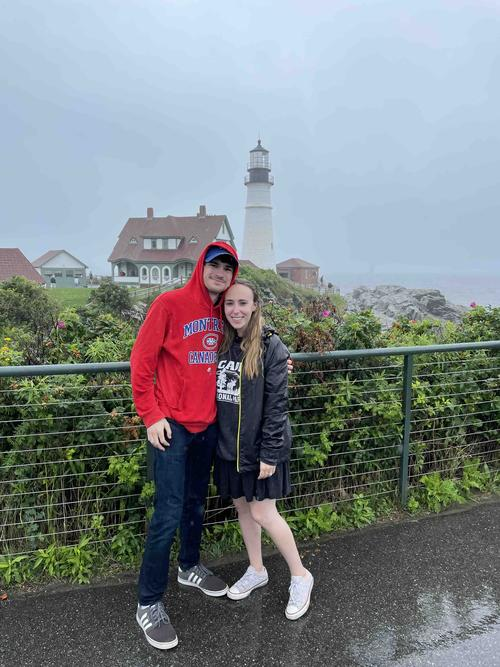